##### This Notebook will cover the data exploration of Bike Rental Data in DC . Data was downloaded from
http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset


In [2]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
bike_rental = pd.read_csv("/Users/shobhit/Documents/python/GitHub/PythonCode/Bikesharing/day.csv")

In [6]:
print(bike_rental.head(2))

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   

   cnt  
0  985  
1  801  


folowing code will calculate the probability of days when more than 5000 bikes were rented

In [7]:
days_over_threshold = bike_rental[bike_rental["cnt"]>5000].shape[0]
probability_over_5000 = days_over_threshold/bike_rental.shape[0]

In [8]:
print(probability_over_5000)


0.3912448700410397


In [9]:
bikes = bike_rental

In [10]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000



now we know that probaility of having more than 5000 bike rented is .39.
Now we want to know the probability that out of any N days K days will have more than 5000 bikes rented. 


In [11]:
def find_combination_prob(N,K,p,q):
    t1 = p**K
    t2 = q**(N-K)
    return t1*t2


In [15]:
prob_9 = find_combination_prob(10,9,probability_over_5000,(1-probability_over_5000))

In [16]:
prob_9


0.00013076169441937746

In [18]:
import math
def find_prob(N,K,p,q):
    t1 = p**K
    t2 = q**(N-K)
    combo_prob = t1*t2
    numerator = math.factorial(N)
    denominator = math.factorial(K) * math.factorial(N - K)
    combo_count = numerator / denominator
    return combo_prob * combo_count

outcome_counts = list(range(31))
outcome_probs = [find_prob(30, i, .39, .61) for i in outcome_counts]
    

In [21]:
outcome_probs[:5]

[3.6299032553937196e-07,
 6.962273457066644e-06,
 6.454369901592111e-05,
 0.0003851460072425456,
 0.0016621260066655757]

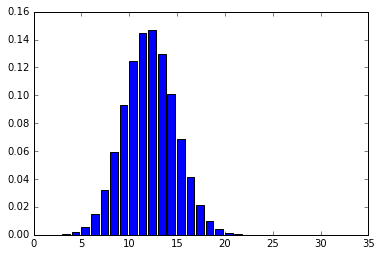

In [22]:
import matplotlib.pyplot as plt

# The most likely number of days is between 10 and 15.
plt.bar(outcome_counts, outcome_probs)
plt.show()

as we can see that we heat the sweet spot some where at 14 , which is close to what would we expect.

array([  3.62990326e-07,   6.96227346e-06,   6.45436990e-05,
         3.85146007e-04,   1.66212601e-03])

2.671516423307182

We are trying to Predict  the number of booking during a certain period of day 

In [13]:
bike_rentals  = pd.read_csv("/Users/shobhit/Documents/python/GitHub/PythonCode/Bikesharing/hour.csv")

In [25]:
bike_rentals.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,2.492548
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,1.115284
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,1.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,2.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,3.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,4.000000


In [26]:
bike_rentals.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


(array([ 6972.,  3705.,  2659.,  1660.,   987.,   663.,   369.,   188.,
          139.,    37.]),
 array([   1. ,   98.6,  196.2,  293.8,  391.4,  489. ,  586.6,  684.2,
         781.8,  879.4,  977. ]),
 <a list of 10 Patch objects>)

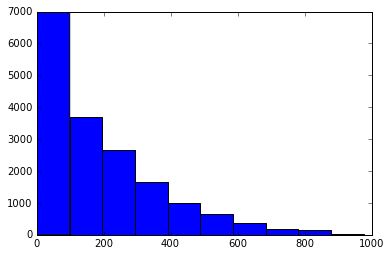

In [15]:
plt.hist(bike_rentals["cnt"])

In [23]:
bike_rentals.corr()["cnt"]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
time_label   -0.378318
Name: cnt, dtype: float64

The  # hr
column in bike_rentals contains hours that bikes are rented, from 1 to 24. A machine will treat each hour differently, and not understand that certain hours are related. We can introduce some order into this by creating a new column with labels for morning, afternoon, evening, and night. This will bundle up similar times together, and enable the model to make better decisions.



I am writing a function called assign_label that takes in a numeric hour value, and returns:
1 if the hour is from 6 to 12.
2 if the hour is from 12 to 18.
3 if the hour is from 18 to 24.
4 if the hour is from 0 to 6.

In [17]:
def assign_label(hour):
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3

bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

The mean squared error metric makes the most sense to evaluate our error. MSE works on continuous numeric data, which fits our data quite well.

In [19]:
train = bike_rentals.sample(frac=.8, random_state = 1)


In [20]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [21]:
from sklearn.linear_model import LinearRegression

predictors = list(train.columns)
predictors.remove("cnt")
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("dteday")

reg = LinearRegression()

reg.fit(train[predictors], train["cnt"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
import numpy
predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)

17052.124871247554

In [31]:
test["cnt"]

0         16
14       106
15       110
18        35
20        36
23        39
27         6
29         2
30         1
31         8
41        53
42        30
49         1
51        30
52        64
53       154
56        51
59        77
61        76
71         1
73         4
76       179
80        78
88        54
113       42
114       19
124       45
132      163
144       84
148       67
        ... 
17237      1
17241     36
17249     20
17250     13
17253     43
17254     35
17265     45
17269     75
17273    119
17277    197
17279     91
17283     25
17289     51
17296    222
17298    225
17300    271
17305     62
17308     37
17316     49
17318     45
17320     84
17328     60
17335      7
17336      2
17341    122
17350    102
17361     40
17366    157
17371    214
17377     61
Name: cnt, dtype: int64

# Error
The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.

In [32]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(min_samples_leaf=5)

reg.fit(train[predictors], train["cnt"])


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [33]:
predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)

2744.38921514417

In [34]:
reg = DecisionTreeRegressor(min_samples_leaf=2)

reg.fit(train[predictors], train["cnt"])

predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)

2813.2476985040294


Decision tree error
By taking the nonlinear predictors into account, the decision tree regressor appears to have much higher accuracy than linear regression

In [35]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[predictors], train["cnt"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [36]:
predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)


2159.7230286078343

In [50]:
reg = RandomForestRegressor(n_estimators = 25, n_jobs = 2, min_samples_leaf = 3)
reg.fit(train[predictors], train["cnt"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=25, n_jobs=2, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [51]:
predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)

1926.7043509088685